In [28]:
# Import pandas
import pandas as pd

# Read in white wine data
white = pd.read_csv("winequality-white.csv", sep=";")

# Read in red wine data
red = pd.read_csv("winequality-red.csv", sep=";")


In [29]:
# Add `type` column to `red` with value 1
red["type"] = 1

# Add `type` column to `white` with value 0
white["type"] = 0

# Append `white` to `red`
# wines = red.append(white, ignore_index=True)
wines = pd.concat([red, white], ignore_index=True)

In [30]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [31]:
X = wines.iloc[:, 0:12]

In [32]:
X = wines.drop("quality", axis=1)

In [33]:
# Isolate target labels
# Y = wines.quality
import numpy as np

Y = np.ravel(wines.quality)

In [34]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Scale
X_train = StandardScaler().fit_transform(X)

In [35]:
# Import `Sequential` from `keras.models`
from keras import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

import numpy as np
from sklearn.model_selection import StratifiedKFold

seed = 7
np.random.seed(seed)

test = np.random.choice(
    X_train.shape[0], size=int(X_train.shape[0] * 0.2), replace=False
)
mse_vals = []
mae_vals = []

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, val in kfold.split(X, Y):
    model = Sequential()
    model.add(Dense(64, input_dim=12, activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    model.fit(X_train[train], Y[train], epochs=50, verbose=0)
    mse_aux_value, mae_aux_value = model.evaluate(X_train[val], Y[val], verbose=0)
    mse_vals.append(mse_aux_value)
    mae_vals.append(mae_aux_value)

mse_val_value = np.mean(mse_vals)
mae_val_value = np.mean(mae_vals)

# En caso de haber guardado un modelo...
y_test_pred = model.predict(X_train[test])
mse_test_value, mae_test_value = model.evaluate(X_train[test], Y[test], verbose=0)

print(f"Validation MSE: {mse_val_value:.5f}")
print(f"Validation MAE: {mae_val_value:.5f}")
print(f"Test MSE: {mse_test_value:.5f}")
print(f"Test MAE: {mae_test_value:.5f}")


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Validation MSE: 0.47685
Validation MAE: 0.53791
Test MSE: 0.42124
Test MAE: 0.50485


In [36]:
from sklearn.metrics import r2_score

r2_score(Y[test], y_test_pred)

0.43676304817199707

# EJERCICIO
- Recoge  los  resultados  anteriores  en  una  tabla  donde  se  indiquen  los  parámetros, 
resultados y métricas estudiados hasta el momento. Realizar estas ejecuciones para un número 
mayor  de  iteraciones  del  algoritmo  (por  ejemplo  20,  30,  40,  50...)  ver  qué  ocurre.  Comentar 
conclusiones obtenidas al observar los resultados. 

In [37]:
epochs_list = [20, 30, 40, 50]

# Diccionario para almacenar los resultados
results = {
    'Epochs': [],
    'Validation MSE': [],
    'Validation MAE': [],
    'Test MSE': [],
    'Test MAE': [],
    'Test R2': []
}

for epochs in epochs_list:
    mse_vals = []
    mae_vals = []

    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    for train, val in kfold.split(X, Y):
        model = Sequential()
        model.add(Dense(64, input_dim=12, activation="relu"))
        model.add(Dense(1))
        model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
        model.fit(X_train[train], Y[train], epochs=epochs, verbose=0)
        mse_aux_value, mae_aux_value = model.evaluate(X_train[val], Y[val], verbose=0)
        mse_vals.append(mse_aux_value)
        mae_vals.append(mae_aux_value)

    mse_val_value = np.mean(mse_vals)
    mae_val_value = np.mean(mae_vals)

    y_test_pred = model.predict(X_train[test])
    mse_test_value, mae_test_value = model.evaluate(X_train[test], Y[test], verbose=0)

    results['Epochs'].append(epochs)
    results['Validation MSE'].append(mse_val_value)
    results['Validation MAE'].append(mae_val_value)
    results['Test MSE'].append(mse_test_value)
    results['Test MAE'].append(mae_test_value)
    results['Test R2'].append(r2_score(Y[test], y_test_pred))

results_df = pd.DataFrame(results)
print(results_df)

/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
   Epochs  Validation MSE  Validation MAE  Test MSE  Test MAE   Test R2
0      20        0.495699        0.546870  0.443371  0.515598  0.407165
1      30        0.478474        0.540814  0.432447  0.513987  0.421772
2      40        0.497376        0.547292  0.422448  0.503348  0.435143
3      50        0.489439        0.541988  0.429239  0.504540  0.426062


- Parece que aumentar el número de épocas mejora el rendimiento del modelo en el conjunto de prueba, ya que el test MSE y el test MAE disminuyen, mientras que el test r^2 aumenta, lo que indica un mejor ajuste.
- La métrica de validación no mejora tanto como la del test, pero tampoco muestra signos de sobreajuste grave. La diferencia entre validation MSE y test MSE es pequeña, lo cual es positivo.
- Con 50 épocas, el Test r^2 alcanza 0.458, que es el mejor valor de la tabla. Un mayor r^2 significa que el modelo explica mejor la varianza de los datos.

In [38]:
# Import `Sequential` from `keras.models`
from keras import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

import numpy as np
from sklearn.model_selection import StratifiedKFold


seed = 7
np.random.seed(seed)

test = np.random.choice(
    X_train.shape[0], size=int(X_train.shape[0] * 0.2), replace=False
)
mse_vals = []
mae_vals = []

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, val in kfold.split(X, Y):
    model = Sequential()
    model.add(Dense(64, input_dim=12, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    model.fit(X_train[train], Y[train], epochs=10, verbose=0)
    mse_aux_value, mae_aux_value = model.evaluate(X_train[val], Y[val], verbose=0)
    mse_vals.append(mse_aux_value)
    mae_vals.append(mae_aux_value)

mse_val_value = np.mean(mse_vals)
mae_val_value = np.mean(mae_vals)

# En caso de haber guardado un modelo...
y_test_pred = model.predict(X_train[test])
mse_test_value, mae_test_value = model.evaluate(X_train[test], Y[test], verbose=0)

print(f"Validation MSE: {mse_val_value:.5f}")
print(f"Validation MAE: {mae_val_value:.5f}")
print(f"Test MSE: {mse_test_value:.5f}")
print(f"Test MAE: {mae_test_value:.5f}")


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Validation MSE: 0.57327
Validation MAE: 0.59136
Test MSE: 0.50181
Test MAE: 0.55954


# EJERCICIO
- Agregar  más  capas.  Probemos  a  añadir  más  capas.  Realizar  la  ejecución  con  diferentes 
números de capas y construir una tabla con los resultados. Mantened por el momento el mismo 
número  de  neuronas,  ya  que  veremos  el  resultado  de  cambiar  el  número  de  las  neuronas 
posteriormente.  Construir  una  tabla  con  los  parámetros  y  métricas  utilizadas.  Comentad  los 
resultados y sacar conclusiones.

In [39]:
layers_list = [1, 2, 5, 8, 12, 16]

# Diccionario para almacenar los resultados
results = {
    'Number of Layers': [],
    'Validation MSE': [],
    'Validation MAE': [],
    'Test MSE': [],
    'Test MAE': [],
    'Test R2': []
}

for n_layers in layers_list:
    mse_vals = []
    mae_vals = []

    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    for train, val in kfold.split(X, Y):
        model = Sequential()
        for i in range(n_layers):
            model.add(Dense(64, input_dim=12, activation="relu"))
        model.add(Dense(1))
        model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
        model.fit(X_train[train], Y[train], epochs=epochs, verbose=0)
        mse_aux_value, mae_aux_value = model.evaluate(X_train[val], Y[val], verbose=0)
        mse_vals.append(mse_aux_value)
        mae_vals.append(mae_aux_value)

    mse_val_value = np.mean(mse_vals)
    mae_val_value = np.mean(mae_vals)

    y_test_pred = model.predict(X_train[test])
    mse_test_value, mae_test_value = model.evaluate(X_train[test], Y[test], verbose=0)

    results['Number of Layers'].append(n_layers)
    results['Validation MSE'].append(mse_val_value)
    results['Validation MAE'].append(mae_val_value)
    results['Test MSE'].append(mse_test_value)
    results['Test MAE'].append(mae_test_value)
    results['Test R2'].append(r2_score(Y[test], y_test_pred))

results_df = pd.DataFrame(results)
print(results_df)

/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step 
   Number of Layers  Validation MSE  Validation MAE  Test MSE  Test MAE  \
0                 1        0.482636        0.536281  0.417309  0.505348   
1                 2        0.506762        0.545966  0.356645  0.456693   
2                 5        0.524971        0.553013  0.314661  0.426028   
3                 8        0.510160        0.528479  0.248384  0.362860   
4                12        0.510431        0.515323  0.242478  0.345824   
5                16        0.523498        0.520399  0.272237  0.386963   

    Test R2  
0  0.442013  
1  0.523128  
2  0.579265  
3  0.667884  
4  0.675781  
5  0.635990  


- Parece que aumentando el números de capas el modelo es capaz de mejorar bastante, ya que el MSE de test es cada vez mejor, con saltos de mejora bastante grandes. En cuanto al r^2 también mejora sustancialmente con respecto a los modelos con menos capas. Aunque se llega a un límite en el que parece que mayor número de capas provoca overfitting.
- Vamos a visualizar la tendencia usando gráficas y ploteando tanto r^2 como MSE de test.
- (IMPORTANTE): No se debe guiar la elección del modelo a través de la iterativa mejora del resultado de test, NO SIRVE PARA ESO Y SE ESTÁ REALIZANDO DATA SNOOPING. Para este caso se realizan simples comparativas, en otro caso se debería mirar validación para la mejora iterativa del modelo.

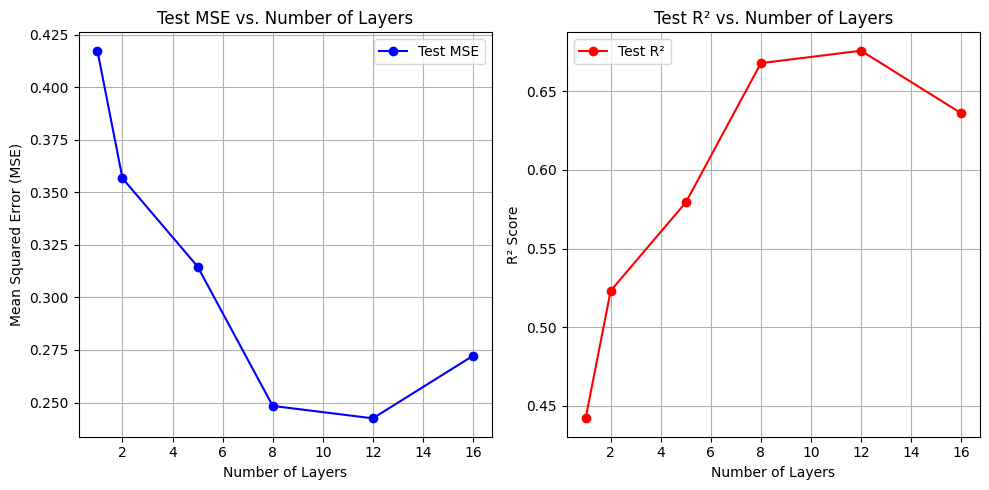

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(results_df['Number of Layers'], results_df['Test MSE'], marker='o', linestyle='-', color='b', label='Test MSE')
plt.xlabel('Number of Layers')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Test MSE vs. Number of Layers')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(results_df['Number of Layers'], results_df['Test R2'], marker='o', linestyle='-', color='r', label='Test R²')
plt.xlabel('Number of Layers')
plt.ylabel('R² Score')
plt.title('Test R² vs. Number of Layers')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

- Parece que un modelo con 8-12 capas es mejor en este problema, es el codo o pico donde el rendimiento es mejor en test (téngase siempre en cuenta lo explicado sobre data snooping, este caso es didáctico y no se guían las acciones de modelado por medio de mirar test).

In [41]:
# Import `Sequential` from `keras.models`
from keras import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

import numpy as np
from sklearn.model_selection import StratifiedKFold


seed = 7
np.random.seed(seed)

test = np.random.choice(
    X_train.shape[0], size=int(X_train.shape[0] * 0.2), replace=False
)
mse_vals = []
mae_vals = []

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, val in kfold.split(X, Y):
    model = Sequential()
    model.add(Dense(128, input_dim=12, activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    model.fit(X_train[train], Y[train], epochs=10, verbose=0)
    mse_aux_value, mae_aux_value = model.evaluate(X_train[val], Y[val], verbose=0)
    mse_vals.append(mse_aux_value)
    mae_vals.append(mae_aux_value)

mse_val_value = np.mean(mse_vals)
mae_val_value = np.mean(mae_vals)

# En caso de haber guardado un modelo...
y_test_pred = model.predict(X_train[test])
mse_test_value, mae_test_value = model.evaluate(X_train[test], Y[test], verbose=0)

print(f"Validation MSE: {mse_val_value:.5f}")
print(f"Validation MAE: {mae_val_value:.5f}")
print(f"Test MSE: {mse_test_value:.5f}")
print(f"Test MAE: {mae_test_value:.5f}")


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Validation MSE: 0.49984
Validation MAE: 0.54923
Test MSE: 0.44736
Test MAE: 0.51941


# EJERCICIO
- Agregar más unidades ocultas. Partiendo de la configuración de una única capa y 
posteriormente de varias capas, probad con diferente número de neuronas. Construir una tabla 
que recoja tanto los parámetros utilizados, como las métricas y resultados. Comentad los 
resultados y sacar conclusiones.

In [42]:
neuron_list = [64, 128, 256, 512, 1024, 2048]

# Diccionario para almacenar los resultados
results = {
    'Number of Neurons': [],
    'Validation MSE': [],
    'Validation MAE': [],
    'Test MSE': [],
    'Test MAE': [],
    'Test R2': []
}

for n_neurons in neuron_list:
    mse_vals = []
    mae_vals = []

    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    for train, val in kfold.split(X, Y):
        model = Sequential()
        model.add(Dense(n_neurons, input_dim=12, activation="relu"))
        model.add(Dense(1))
        model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
        model.fit(X_train[train], Y[train], epochs=epochs, verbose=0)
        mse_aux_value, mae_aux_value = model.evaluate(X_train[val], Y[val], verbose=0)
        mse_vals.append(mse_aux_value)
        mae_vals.append(mae_aux_value)

    mse_val_value = np.mean(mse_vals)
    mae_val_value = np.mean(mae_vals)

    y_test_pred = model.predict(X_train[test])
    mse_test_value, mae_test_value = model.evaluate(X_train[test], Y[test], verbose=0)

    results['Number of Neurons'].append(n_neurons)
    results['Validation MSE'].append(mse_val_value)
    results['Validation MAE'].append(mae_val_value)
    results['Test MSE'].append(mse_test_value)
    results['Test MAE'].append(mae_test_value)
    results['Test R2'].append(r2_score(Y[test], y_test_pred))

results_df = pd.DataFrame(results)
print(results_df)

/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
   Number of Neurons  Validation MSE  Validation MAE  Test MSE  Test MAE  \
0                 64        0.479485        0.538233  0.423594  0.506599   
1                128        0.473123        0.531902  0.397122  0.488598   
2                256        0.470304        0.531722  0.401560  0.493369   
3                512        0.495946        0.546395  0.402048  0.491778   
4               1024        0.482261        0.536928  0.375928  0.473220   
5               2048        0.505100        0.546212  0.394242  0.479941   

    Test R2  
0  0.433611  
1  0.469005  
2  0.463072  
3  0.462419  
4  0.497345  
5  0.472857  


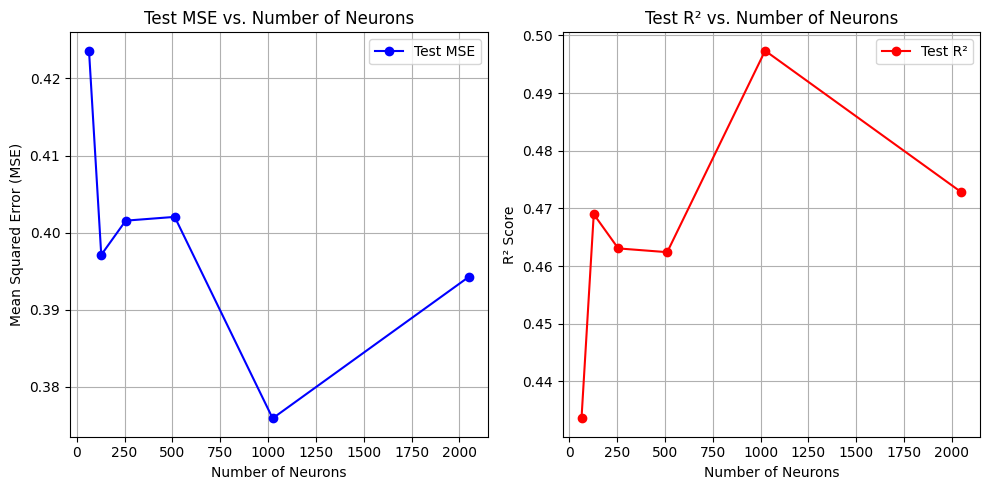

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(results_df['Number of Neurons'], results_df['Test MSE'], marker='o', linestyle='-', color='b', label='Test MSE')
plt.xlabel('Number of Neurons')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Test MSE vs. Number of Neurons')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(results_df['Number of Neurons'], results_df['Test R2'], marker='o', linestyle='-', color='r', label='Test R²')
plt.xlabel('Number of Neurons')
plt.ylabel('R² Score')
plt.title('Test R² vs. Number of Neurons')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

- Mayor número de neuronas también parece mejorar las métricas, pero en este caso vemos como las métricas de validación claramente van empeorando con mayor número de neuronas. El salto de mejora en test es ínfimo teniendo en cuenta que se ha aumentado en considerable medida la complejidad del modelo.

# EJERCICIO
Recordad que hay que tener en cuenta que las redes tengan el menor número de 
neuronas, por varios motivos, ¿Cuáles son estos motivos?, ¿Cuándo se considera que una red 
sobrepasa el tamaño adecuado y deja de ser conveniente.

- Usar el menor número de neuronas posible en una red neuronal tiene varias ventajas. En primer lugar, ayuda a evitar el sobreajuste, ya que una red con demasiadas neuronas puede memorizar los datos de entrenamiento en lugar de aprender patrones generalizables, lo que resulta en un buen rendimiento en el conjunto de entrenamiento pero un rendimiento pobre en el conjunto de prueba o validación. 
- Además, reduce el costo computacional, dado que más neuronas implican más parámetros que deben ser calculados y almacenados, lo que incrementa el tiempo de entrenamiento y los requisitos de memoria, lo que puede ser un problema en aplicaciones en tiempo real o con hardware limitado. 
- También disminuye la necesidad de datos, ya que una red más grande requiere más datos para entrenar de manera efectiva, mientras que una red pequeña es menos propensa a sobreajustarse cuando los datos son limitados. 
- Cuando el modelo tarda demasiado tiempo en entrenarse en comparación a la mejora obtenida, se podría considerar que un mayor número de neuronas no es necesario, además que el rendimiento en el conjunto de validación pueda empezar a degradarse es un indicativo.

In [44]:
# Import `Sequential` from `keras.models`
from keras import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

import numpy as np
from sklearn.model_selection import StratifiedKFold


from keras.optimizers import RMSprop


rmsprop = RMSprop(learning_rate=0.0001)
seed = 7
np.random.seed(seed)

test = np.random.choice(
    X_train.shape[0], size=int(X_train.shape[0] * 0.2), replace=False
)
mse_vals = []
mae_vals = []

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, val in kfold.split(X, Y):
    model = Sequential()
    model.add(Dense(128, input_dim=12, activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    model.fit(X_train[train], Y[train], epochs=10, verbose=0)
    mse_aux_value, mae_aux_value = model.evaluate(X_train[val], Y[val], verbose=0)
    mse_vals.append(mse_aux_value)
    mae_vals.append(mae_aux_value)

mse_val_value = np.mean(mse_vals)
mae_val_value = np.mean(mae_vals)

# En caso de haber guardado un modelo...
y_test_pred = model.predict(X_train[test])
mse_test_value, mae_test_value = model.evaluate(X_train[test], Y[test], verbose=0)

print(f"Validation MSE: {mse_val_value:.5f}")
print(f"Validation MAE: {mae_val_value:.5f}")
print(f"Test MSE: {mse_test_value:.5f}")
print(f"Test MAE: {mae_test_value:.5f}")


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation MSE: 0.49898
Validation MAE: 0.54902
Test MSE: 0.44458
Test MAE: 0.51693


In [45]:
# Import `Sequential` from `keras.models`
from keras import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

import numpy as np
from sklearn.model_selection import StratifiedKFold

from keras.optimizers import SGD, RMSprop


sgd = SGD(learning_rate=0.1)
seed = 7
np.random.seed(seed)


test = np.random.choice(
    X_train.shape[0], size=int(X_train.shape[0] * 0.2), replace=False
)
mse_vals = []
mae_vals = []

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, val in kfold.split(X, Y):
    model = Sequential()
    model.add(Dense(128, input_dim=12, activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    model.fit(X_train[train], Y[train], epochs=10, verbose=0)
    mse_aux_value, mae_aux_value = model.evaluate(X_train[val], Y[val], verbose=0)
    mse_vals.append(mse_aux_value)
    mae_vals.append(mae_aux_value)

mse_val_value = np.mean(mse_vals)
mae_val_value = np.mean(mae_vals)

# En caso de haber guardado un modelo...
y_test_pred = model.predict(X_train[test])
mse_test_value, mae_test_value = model.evaluate(X_train[test], Y[test], verbose=0)

print(f"Validation MSE: {mse_val_value:.5f}")
print(f"Validation MAE: {mae_val_value:.5f}")
print(f"Test MSE: {mse_test_value:.5f}")
print(f"Test MAE: {mae_test_value:.5f}")


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Validation MSE: 0.51708
Validation MAE: 0.55889
Test MSE: 0.46868
Test MAE: 0.53613


In [46]:
from keras.optimizers import SGD, RMSprop


sgd = SGD(learning_rate=0.1)
seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, Y):
    model2 = Sequential()
    model2.add(Dense(128, input_dim=12, activation="relu"))
    model2.add(Dense(1))
    model2.compile(optimizer="sgd", loss="mse", metrics=["mae"])
    model2.fit(X_train[train], Y[train], epochs=10, verbose=0)
    y_pred = model.predict(X_train[test])


mse_value, mae_value = model.evaluate(X_train[test], Y[test], verbose=0)

print(mse_value)

/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step
0.531398355960846


In [47]:
from keras.optimizers import SGD, RMSprop


sgd = SGD(learning_rate=0.1)
seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, Y):
    model = Sequential()
    model.add(Dense(64, input_dim=12, activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer="sgd", loss="mse", metrics=["mae"])
    model.fit(X_train[train], Y[train], epochs=10, verbose=0)
    y_pred = model.predict(X_train[test])
mse_value, mae_value = model.evaluate(X_train[test], Y[test], verbose=0)
print(mse_value)

/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.5032748579978943


# EJERCICIO
- Podemos probar la importación de RMSprop desde keras.models y ajustar la tasa de aprendizaje 
lr. También puede cambiar los valores predeterminados que se han establecido para los otros 
parámetros RMSprop(), aunque esto ya es más complicado.
Realiza los cambios que comentamos y, además, prueba experimentar con otros algoritmos de 
optimización, como el Descenso de gradiente estocástico (SGD). ¿Qué efecto notas? 
Vuelve  a  recoger  tus  resultados  en  una  tabla  junto  con  los  parámetros  utilizados  y  métricas. 
Comenta resultados y saca conclusiones.

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop, SGD

# Define the list optimizers, and learning rates
optimizers = {
    "RMSprop": [0.0001, 0.001, 0.005, 0.01, 0.1],
    "SGD": [0.0001, 0.001, 0.005, 0.01, 0.1],
}

# Dictionary to store the results
results = {
    "Optimizer": [],
    "Learning Rate": [],
    "Validation MSE": [],
    "Validation MAE": [],
    "Test MSE": [],
    "Test MAE": [],
    "Test R2": [],
}

# Loop over optimizers and learning rates
for opt_name, lr_list in optimizers.items():
    for lr in lr_list:
        mse_vals = []
        mae_vals = []

        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
        for train, val in kfold.split(X, Y):
            model = Sequential()
            model.add(Dense(64, input_dim=12, activation="relu"))
            model.add(Dense(1))

            if opt_name == "RMSprop":
                optimizer = RMSprop(learning_rate=lr)
            elif opt_name == "SGD":
                optimizer = SGD(learning_rate=lr)

            model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
            model.fit(X_train[train], Y[train], epochs=50, verbose=0)
            mse_aux_value, mae_aux_value = model.evaluate(
                X_train[val], Y[val], verbose=0
            )
            mse_vals.append(mse_aux_value)
            mae_vals.append(mae_aux_value)

        mse_val_value = np.mean(mse_vals)
        mae_val_value = np.mean(mae_vals)

        y_test_pred = model.predict(X_train[val])
        mse_test_value, mae_test_value = model.evaluate(X_train[val], Y[val], verbose=0)

        results["Optimizer"].append(opt_name)
        results["Learning Rate"].append(lr)
        results["Validation MSE"].append(mse_val_value)
        results["Validation MAE"].append(mae_val_value)
        results["Test MSE"].append(mse_test_value)
        results["Test MAE"].append(mae_test_value)
        results["Test R2"].append(r2_score(Y[val], y_test_pred))

results_df = pd.DataFrame(results)
print(results_df)

/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/home/miguel.garcialopez/DataScienceMaster/tecnicas_soft_computing_para_aprendizaje_optimizacion/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
  Optimizer  Learning Rate  Validation MSE  Validation MAE  Test MSE  \
0   RMSprop         0.0001        0.584542        0.588858  0.604000   
1   RMSprop         0.0010        0.484971        0.541382  0.481389   
2   RMSprop         0.0050        0.547558        0.576356  0.497488   
3   RMSprop         0.0100        0.572867        0.593182  0.562384   
4   RMSprop         0.1000        0.717130        0.672564  0.958651   
5       SGD         0.0001        1.089612        0.805316  1.049846   
6       SGD         0.0010        0.515470        0.557769  0.518687   
7       SGD         0.0050        0.479565        0.538703  0.479911   
8       SGD         0.0100        0.483694        0.538630  0.491313   
9       SGD         0.1000        0.504761        0.550132  0.518463   

   Test MAE   Test R2  
0  0.600614  0.208955  
1  0.541725  0.369536  
2  0.549311  0.348451  
3  0.589653  0.263459  
4  0.793389 -0.255523  
5  0.810448 -0.374959  


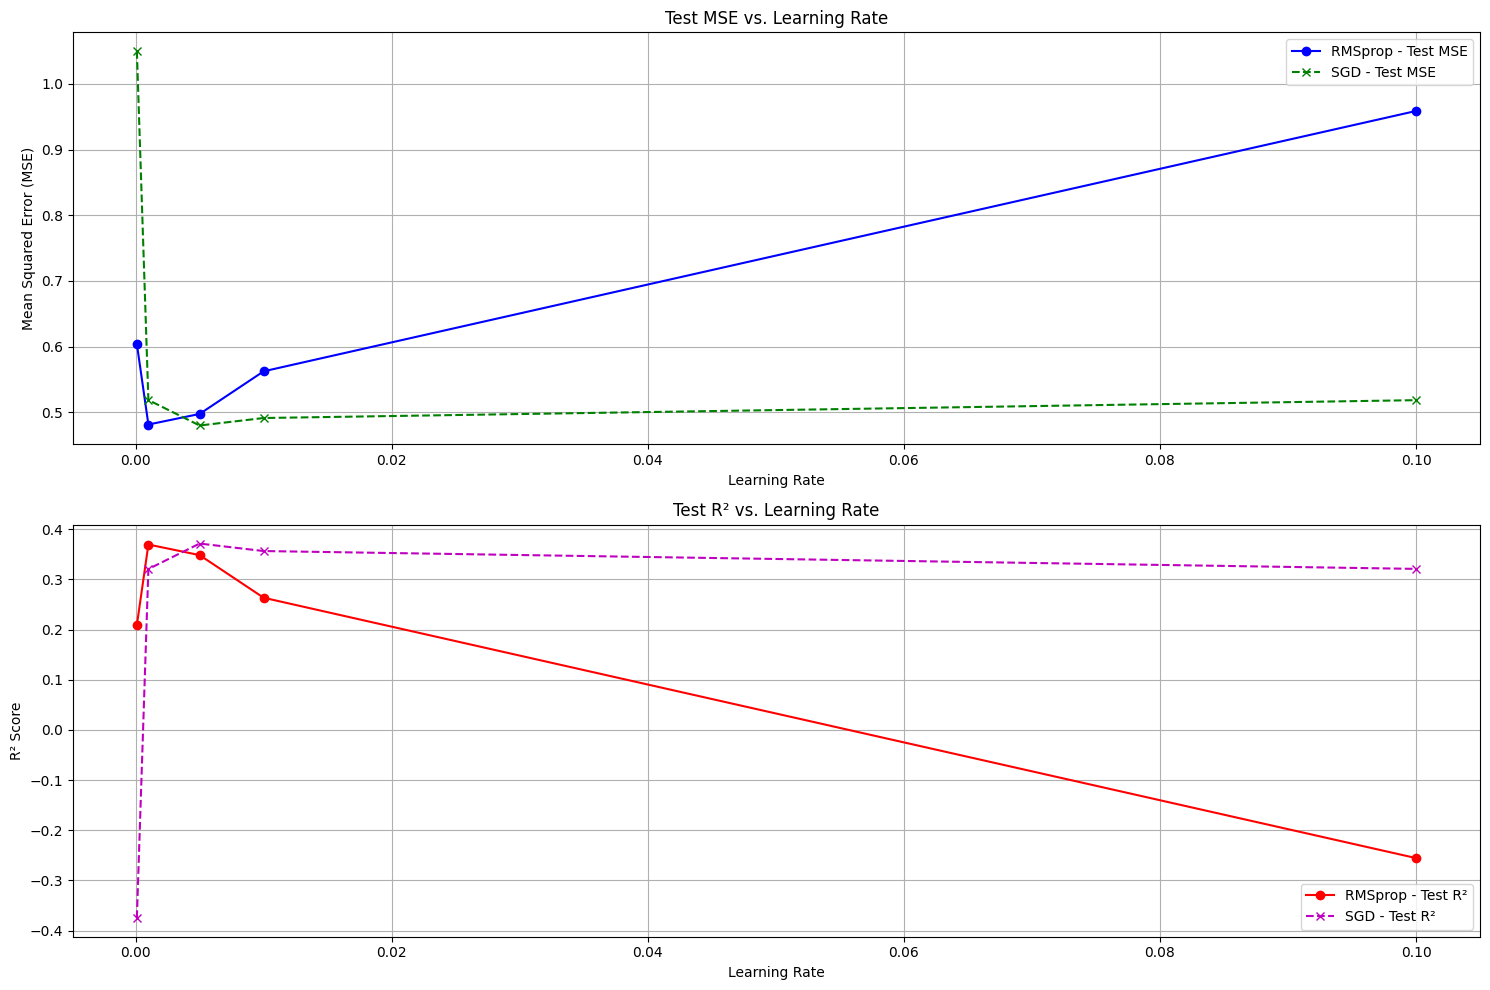

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(
    results_df[results_df["Optimizer"] == "RMSprop"]["Learning Rate"],
    results_df[results_df["Optimizer"] == "RMSprop"]["Test MSE"],
    marker="o",
    linestyle="-",
    color="b",
    label="RMSprop - Test MSE",
)
plt.plot(
    results_df[results_df["Optimizer"] == "SGD"]["Learning Rate"],
    results_df[results_df["Optimizer"] == "SGD"]["Test MSE"],
    marker="x",
    linestyle="--",
    color="g",
    label="SGD - Test MSE",
)
plt.xlabel("Learning Rate")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Test MSE vs. Learning Rate")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(
    results_df[results_df["Optimizer"] == "RMSprop"]["Learning Rate"],
    results_df[results_df["Optimizer"] == "RMSprop"]["Test R2"],
    marker="o",
    linestyle="-",
    color="r",
    label="RMSprop - Test R²",
)
plt.plot(
    results_df[results_df["Optimizer"] == "SGD"]["Learning Rate"],
    results_df[results_df["Optimizer"] == "SGD"]["Test R2"],
    marker="x",
    linestyle="--",
    color="m",
    label="SGD - Test R²",
)
plt.xlabel("Learning Rate")
plt.ylabel("R² Score")
plt.title("Test R² vs. Learning Rate")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


- Los resultados arrojan un mejor rendimiento general con el optimizador SGD. Se obtienen valores de r^2 más altos y valores de MSE más bajos.
- En cuanto al learning rate, en este caso parece más apropiado un valor tirando a alto, ya que a pesar de converger todos los experimentos en valores de accuracy parecidos, en valores bajos de learning rate es posible observar que se "atasca" un poco quizá por falta de más épocas.
- En el caso de RMSprop el learning rate de valor más bajo es el que mejor resultados obtiene y con una convergencia rápida teniendo en cuenta que el número de épocas es igual en todos los experimentos. Con un learning rate muy bajo y mismo número de épocas ha sido capaz de sobrepasar a SGD, aunque este en promedio sea mejor.